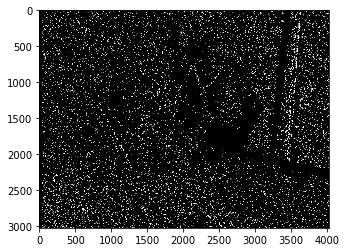

In [7]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgL = cv2.imread('data/l6.jpg',0)
imgR = cv2.imread('data/r6.jpg',0)

stereo = cv2.StereoBM_create(numDisparities=32, blockSize=11)
disparity = stereo.compute(imgL,imgR)
plt.imshow(disparity,'gray')
plt.show()

In [3]:
trackbarName = 'Test' 
windowName = 'TestW'

def on_trackbar(val):
    numDisparities = cv2.getTrackbarPos('sl1', windowName)
    blockSize = cv2.getTrackbarPos('sl2', windowName)
    
    if blockSize%2 == 0:
        blockSize += 1
        
    if blockSize < 5:
        blockSize = 5
        
    numDisparities == 1 if numDisparities == 0 else numDisparities
        
    numDisparities *= 16
    
    print(numDisparities, blockSize)
    
    stereo = cv2.StereoBM_create(numDisparities=numDisparities, blockSize=blockSize)
    disparity = stereo.compute(imgL,imgR)
    
    disparity = cv2.resize(disparity, None,fx=1/8, fy=1/8, interpolation = cv2.INTER_CUBIC)
    norm_coeff = 255 / disparity.max()

    cv2.imshow(windowName, disparity * norm_coeff / 255)
               
cv2.namedWindow(windowName)

cv2.createTrackbar('sl1', windowName, 1, 100, on_trackbar)
cv2.createTrackbar('sl2', windowName, 5, 255, on_trackbar)

# Show some stuff
on_trackbar(1)
# Wait until user press some key
cv2.waitKey()
cv2.destroyAllWindows()

16 5
16 5
16 5
16 21
16 33
16 41
16 39
16 27
16 23
16 23
16 25
16 23
16 21
16 19
16 15
16 15
16 17
0 17
32 17
48 17
64 17
80 17
80 17
80 15
80 15
80 13


In [2]:
trackbarName = 'Test' 
windowName = 'TestW'

def on_trackbar(val):
    numDisparities = cv2.getTrackbarPos('sl1', windowName)
    blockSize = cv2.getTrackbarPos('sl2', windowName)
    
    if blockSize%2 == 0:
        blockSize += 1
        
    if blockSize < 5:
        blockSize = 5
        
    numDisparities == 1 if numDisparities == 0 else numDisparities
        
    numDisparities *= 16
    
    print(numDisparities, blockSize)
    
    window_size = 3
    min_disp = 16
    stereo = cv2.StereoSGBM_create(minDisparity = min_disp,
        numDisparities = numDisparities,
        blockSize = blockSize,
        P1 = 8*3*window_size**2,
        P2 = 32*3*window_size**2,
        disp12MaxDiff = 1,
        uniquenessRatio = 10,
        speckleWindowSize = 100,
        speckleRange = 32
    )
    
    disparity = stereo.compute(imgL,imgR)
    
    disparity = cv2.resize(disparity, None,fx=1/8, fy=1/8, interpolation = cv2.INTER_CUBIC)
    norm_coeff = 255 / disparity.max()
    #cv2.imshow("disparity", disparity * norm_coeff / 255)

    cv2.imshow(windowName, disparity * norm_coeff / 255)
               
cv2.namedWindow(windowName)

cv2.createTrackbar('sl1', windowName, 1, 100, on_trackbar)
cv2.createTrackbar('sl2', windowName, 5, 255, on_trackbar)

# Show some stuff
on_trackbar(1)
# Wait until user press some key
cv2.waitKey()
cv2.destroyAllWindows()

16 5
